In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(dplyr)
library(ggplot2)
library(ggthemes)
library(reshape2)
library(gridExtra)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

df <- read.csv("../input/cities_r2.csv")

# Any results you write to the current directory are saved as output.


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



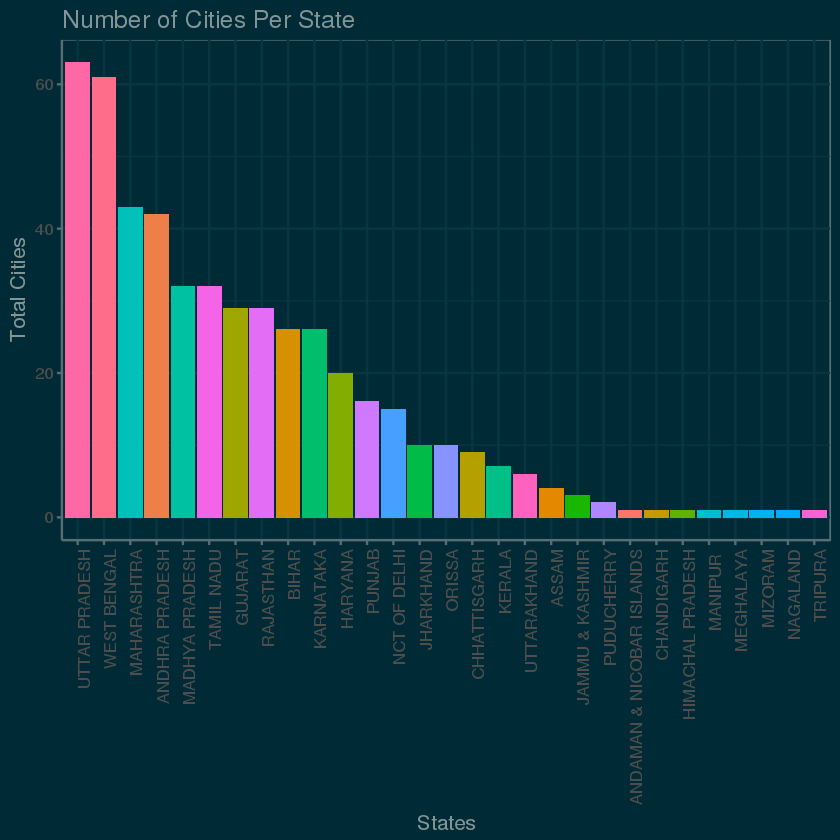

In [2]:
#Number of cities per state
df %>% 
  group_by(state_name) %>% 
  summarise(total_cities = n_distinct(name_of_city)) %>% 
  arrange(desc(total_cities)) %>% 
  ggplot(aes(reorder(x = state_name, -total_cities), y = total_cities))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Number of Cities Per State", x = "States", y = "Total Cities"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("red")+
  theme(text = element_text(size=12),
        axis.text.x = element_text(angle=90, hjust=1),
        legend.position = "none")

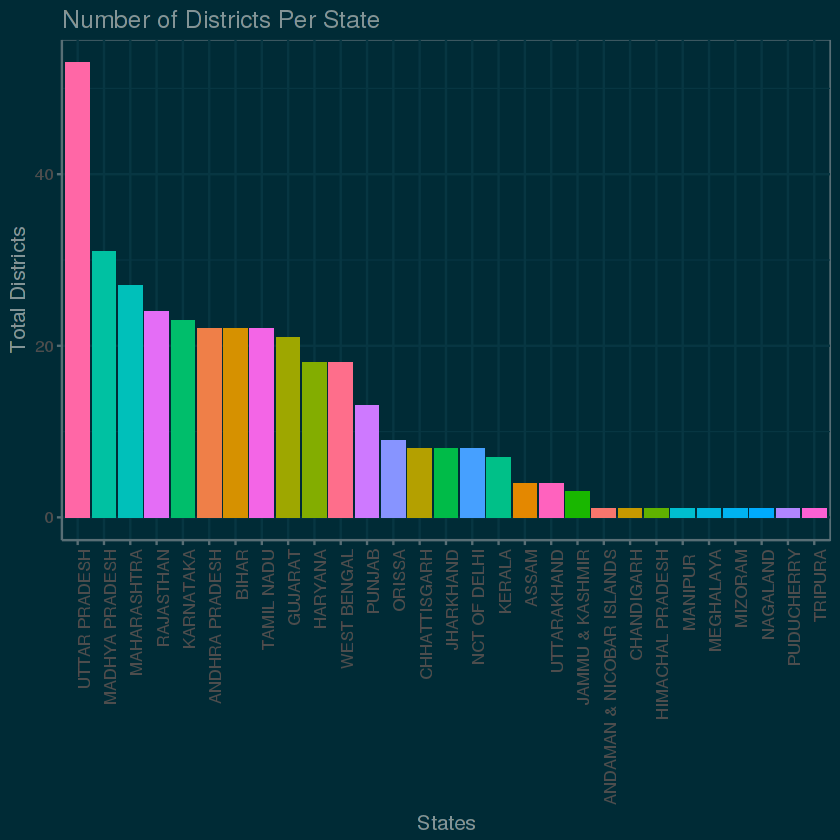

In [3]:
#Number of districts per state

df %>% 
  group_by(state_name) %>% 
  summarise(total_districts = n_distinct(dist_code)) %>% 
  arrange(desc(total_districts)) %>% 
  ggplot(aes(reorder(x = state_name, -total_districts), y = total_districts))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Number of Districts Per State", x = "States", y = "Total Districts"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=12),
        axis.text.x = element_text(angle=90, hjust=1),
        legend.position = "none")

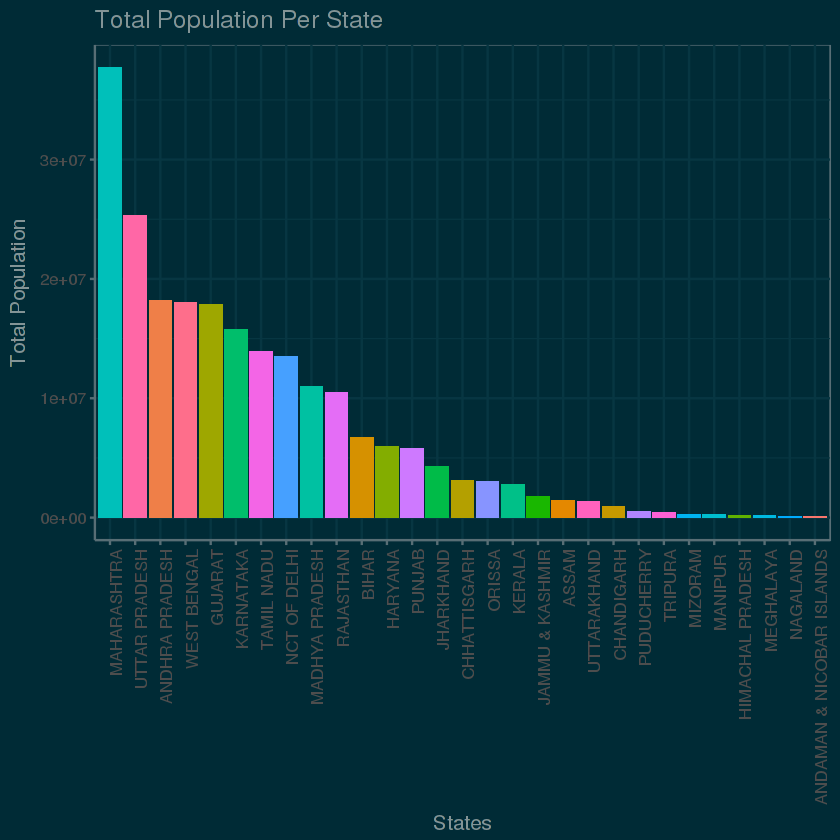

In [4]:
#What is the Population of each state ?
df %>% 
  group_by(state_name) %>% 
  summarise(total = sum(population_total)) %>% 
  arrange(desc(total)) %>% 
  ggplot(aes(reorder(x = state_name, -total), y = total))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Total Population Per State", x = "States", y = "Total Population"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=12),
        axis.text.x = element_text(angle=90, hjust=1),
        legend.position = "none")


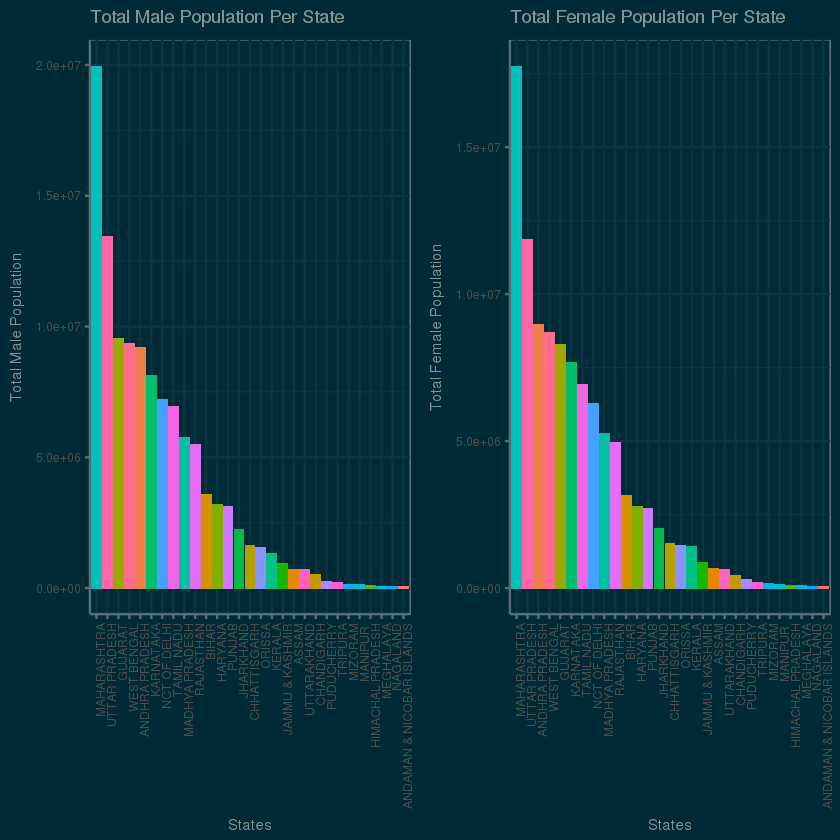

In [5]:
#What is Population of  Male Vs Female in each state?
P1<-df %>% 
  group_by(state_name) %>% 
  summarise(total = sum(population_male)) %>% 
  arrange(desc(total)) %>% 
  ggplot(aes(reorder(x = state_name, -total), y = total))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Total Male Population Per State", x = "States", y = "Total Male Population"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=9),
        axis.text.x = element_text(angle=90, hjust=1),
        legend.position = "none")

P2<-df %>% 
  group_by(state_name) %>% 
  summarise(total = sum(population_female)) %>% 
  arrange(desc(total)) %>% 
  ggplot(aes(reorder(x = state_name, -total), y = total))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Total Female Population Per State", x = "States", y = "Total Female Population"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=9),
        axis.text.x = element_text(angle=90, hjust=1),
        legend.position = "none")

grid.arrange(P1, P2, ncol =2)


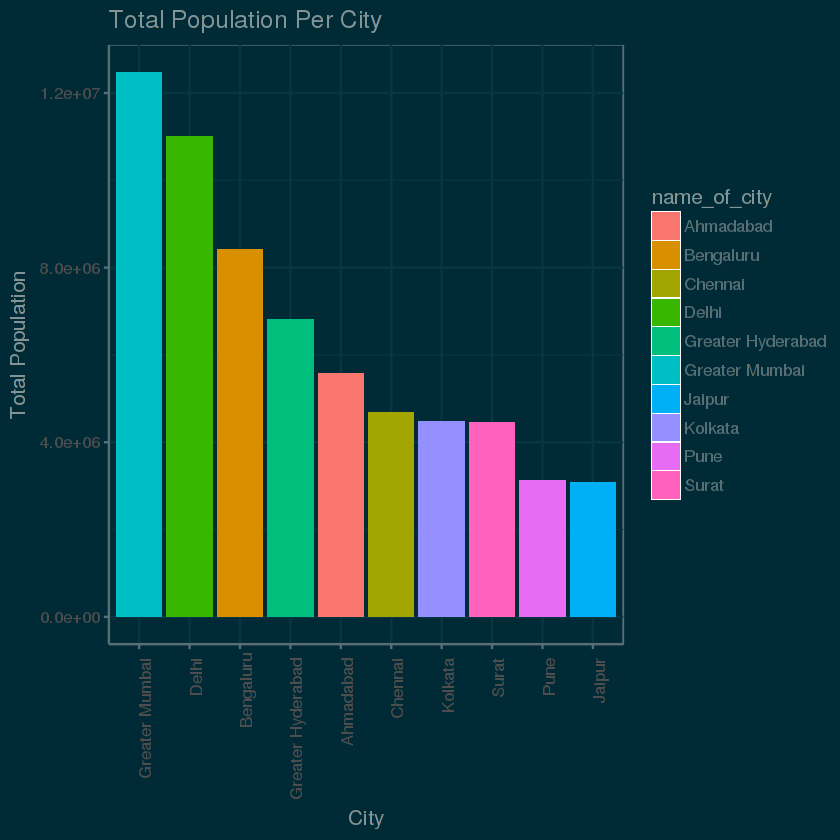

In [6]:
#What are the top 10 most populated cities in India?

df %>% 
  group_by(name_of_city) %>% 
  summarise(total = sum(population_total)) %>% 
  arrange(desc(total)) %>% 
  top_n(n= 10, wt = total) %>% 
  ggplot(aes(reorder(x = name_of_city, -total), y = total))+
  geom_bar(aes(fill = name_of_city), stat = "identity")+
  labs(list(title = "Total Population Per City", x = "City", y = "Total Population"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=12),
        axis.text.x = element_text(angle=90, hjust=1))

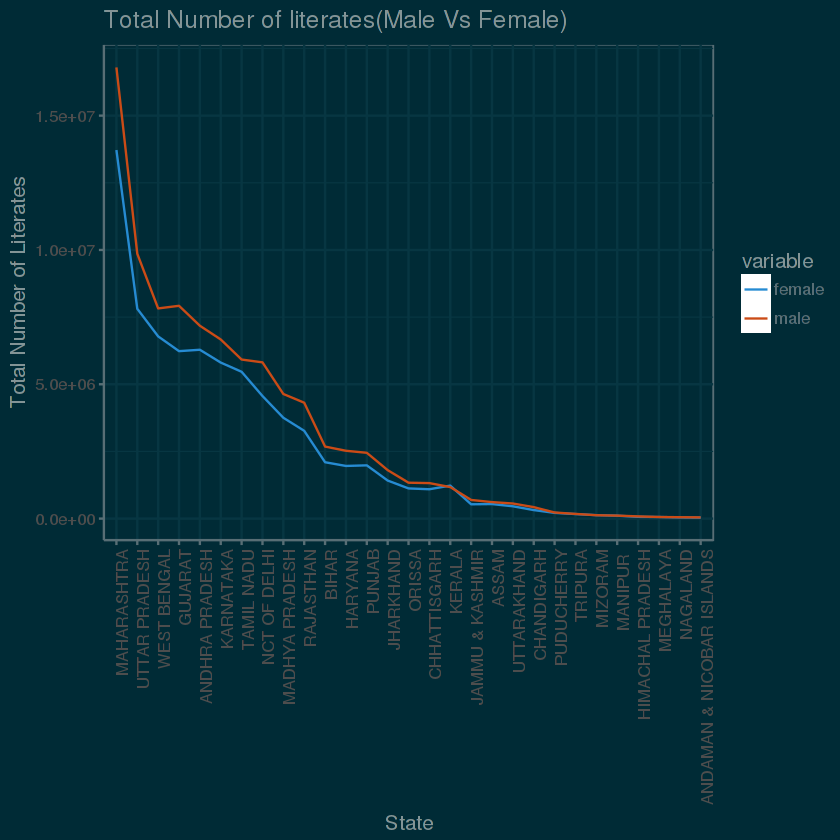

In [7]:
#How many male and female literates are in each state?
df_literate<-df %>% 
  group_by(state_name) %>% 
  summarise(female = sum(literates_female),
            male = sum(literates_male))

mdata<-melt(df_literate, id = "state_name")

ggplot(aes(reorder(x = state_name, -value), y = value, group = variable), data = mdata)+
  geom_line(aes(color = variable))+
  labs(list(title = "Total Number of literates(Male Vs Female)", x = "State", y = "Total Number of Literates"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=12),
        axis.text.x = element_text(angle=90, hjust=1))

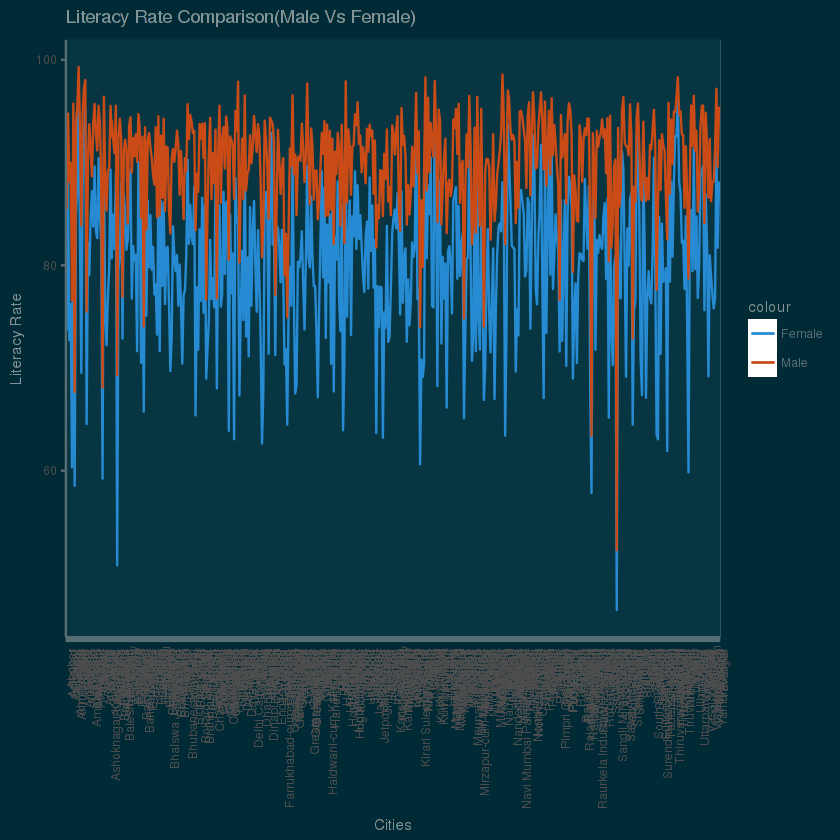

In [8]:
#Literacy Rate Comparison Male Vs Female
ggplot(aes(x = name_of_city, group = 1 ), data = df)+
  geom_line(aes(y = effective_literacy_rate_female, colour = "Female")) +
  geom_line(aes(y = effective_literacy_rate_male, colour = "Male")) +
  labs(list(title = "Literacy Rate Comparison(Male Vs Female)", x = "Cities", y = "Literacy Rate"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=9),
        axis.text.x = element_text(angle=90, hjust=1))

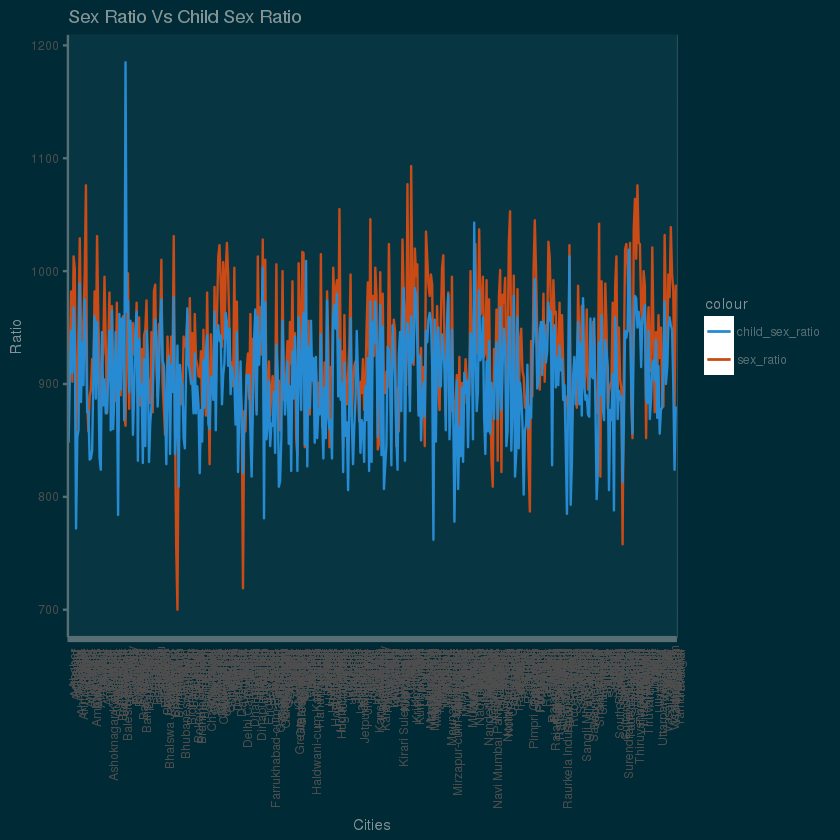

In [9]:
# Sex Ratio and Child Sex Ratio
ggplot(aes(x = name_of_city, group = 1 ), data = df)+
  geom_line(aes(y = sex_ratio, colour = "sex_ratio")) +
  geom_line(aes(y = child_sex_ratio, colour = "child_sex_ratio")) +
  labs(list(title = "Sex Ratio Vs Child Sex Ratio", x = "Cities", y = "Ratio"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=9),
        axis.text.x = element_text(angle=90, hjust=1))